<a href="https://colab.research.google.com/github/bayashi-cl/statistical-learning/blob/working/note/03_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set()
ad = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col=0)

# 3 線形回帰

[スライド](https://web.stanford.edu/~hastie/ISLR2/Slides/Ch3_Linear_Regression.pdf)

線形回帰の特徴
* 教師あり学習
* シンプル
* 定量的な予測に強い

今後に出てくる学習の手法は線形回帰を発展させたものが多い。

`Advertising`（スライドp）のデータからマーケティングプランを提案するにはどのような情報が必要だろうか。

以下のような問題について考える。

1. そもそも広告費と売上の間に関係性はあるか。
1. その関係はどれくらい強いのか。
1. どのメディアがどれだけ売上に貢献しているか。
1. 売上の予測はどれくらい正確か。
1. 関係性は線形か。
1. メディア間の相乗効果は存在するのか。



## 3.1 単回帰

単回帰では $Y$ を目的変数、 $X$ を説明変数として、

$$Y \approx \beta_0 + \beta_1X$$

のようなモデルを考える。例えば`sales`と`TV`の関係なら、

$$\textrm{sales} \approx \beta_0 + \beta_1 \times \textrm{TV}$$

として $\hat{\beta}$ を求める。


## 3.1.1 パラメータの推定

まずは**最小二乗法**で考える（他の考え方は6章で）。

$\hat{y}_i = \hat{\beta_0}+\hat{\beta_1}x_i$ を $i$ 番目のデータに対する推定値として残差を $e_i = y_i - \hat{y_i}$ とする。

ここで**残差平方和**(*residual sum of squares (RSS)*)を

$$\textrm{RSS} = e_1^2+ \cdots + e_n^2$$

と定義してこれを最小化すると、

$$
\begin{aligned}
  \hat{\beta_1} &= \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}\\
  \hat{\beta_0} &= \bar{y}-\hat{\beta_1}\bar{x}
\end{aligned}
$$

となる。
実際に計算をすると



In [57]:
X = ad['TV'].to_numpy()
Y = ad['sales'].to_numpy()
x_bar = X.mean()
y_bar = Y.mean()

numerator = 0.0
denominator = 0.0

for xi, yi in zip(X, Y):
  numerator += (xi - x_bar) * (yi - y_bar)
  denominator += (xi - x_bar)**2

beta_hat_1 = numerator / denominator
beta_hat_0 = y_bar - beta_hat_1 * x_bar

min_rss = 0.0
for xi, yi in zip(X, Y):
  yi_hat = beta_hat_0 + beta_hat_1 * xi
  min_rss += (yi - yi_hat)**2


print(f"sales = {beta_hat_0:.5f} + {beta_hat_1:.5f} * TV")
print(f"rss   = {min_rss:.5f}")

sales = 7.03259 + 0.04754 * TV
rss   = 2102.53058


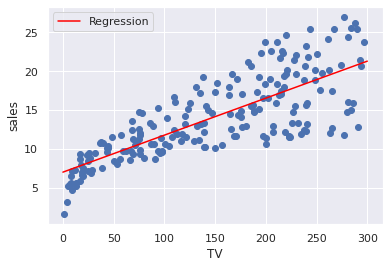

In [59]:
fig, ax = plt.subplots()
ax.scatter(ad['TV'], ad['sales'])
reg_x = np.linspace(0, 300, 100)
reg_y = beta_hat_0 + beta_hat_1 * reg_x
ax.plot(reg_x, reg_y, color="red", label="Regression")
ax.set(xlabel="TV", ylabel="sales")
ax.legend()
plt.show()

In [39]:
sz = 50
b0_ = np.linspace(beta_hat_0 - 2, beta_hat_0 + 2, sz)
b1_ = np.linspace(beta_hat_1 - 0.02, beta_hat_1 + 0.02, sz)
b0, b1 = np.meshgrid(b0_, b1_, indexing='xy')
rss = np.zeros((sz, sz))

for (i, j), _ in np.ndenumerate(rss):
    rss[i, j] = ((Y - (b0[i, j] + X * b1[i, j]))**2).sum() / 1000

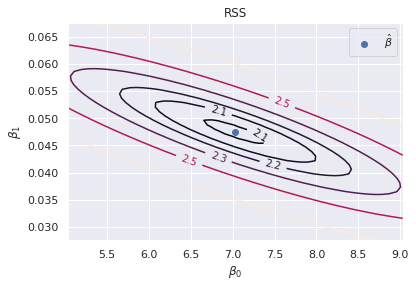

In [60]:
fig, ax = plt.subplots()
cont = ax.contour(b0, b1, rss, levels=[2.11, 2.15, 2.2, 2.3, 2.5, 3])
cont.clabel(fmt='%1.1f', fontsize=10)
ax.scatter(beta_hat_0, beta_hat_1, label=r"$\hat{\beta}$")
ax.set(xlabel=r"$\beta_0$", ylabel=r"$\beta_1$", title="RSS")
ax.legend()
plt.show()

となる。（教科書の数値と一致）
